In [ ]:
# PHM_2024_Group6
# Step1_Data_Preprocessing
# Substitute missing value with mean value
# Prepare three csv files
# Author: Yuan-Jen Chang, Feng Chia University, imCLOUD CO.,LTD.
# Date: Sep. 18 2024

# Importing the libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Define directories
currentDirectory = '/content/drive/MyDrive/PHM_2024_Group6' # root Directory
healthyDataDirectory='/content/drive/MyDrive/PHM_2024_Group6/Data/Training/Healthy'
faulty1DataDirectory='/content/drive/MyDrive/PHM_2024_Group6/Data/Training/Faulty1'
faulty2DataDirectory='/content/drive/MyDrive/PHM_2024_Group6/Data/Training/Faulty2'
testingDataDirectory='/content/drive/MyDrive/PHM_2024_Group6/Data/Testing'
csvDirectory='/content/drive/MyDrive/PHM_2024_Group6/csv'
#rawdata=30000
rawdata=45000
rawdata2=int(rawdata/2)
n=rawdata
print(currentDirectory)
print(healthyDataDirectory)
print(faulty1DataDirectory)
print(faulty2DataDirectory)
print(testingDataDirectory)
print(csvDirectory)

/content/drive/MyDrive/PHM_2024_Group6
/content/drive/MyDrive/PHM_2024_Group6/Data/Training/Healthy
/content/drive/MyDrive/PHM_2024_Group6/Data/Training/Faulty1
/content/drive/MyDrive/PHM_2024_Group6/Data/Training/Faulty2
/content/drive/MyDrive/PHM_2024_Group6/Data/Testing
/content/drive/MyDrive/PHM_2024_Group6/csv


In [ ]:
#測試目錄是否存在

if not os.path.exists(healthyDataDirectory):
    os.makedirs(healthyDataDirectory)
    print(f"Directory '{healthyDataDirectory}' created successfully.")
else:
    print(f"Directory '{healthyDataDirectory}' already exists.")

Directory '/content/drive/MyDrive/PHM_2024_Group6/Data/Training/Healthy' already exists.


In [ ]:
##########  Get healthy data from directory ###########
os.chdir(healthyDataDirectory) # Change directory to healthy data directory
healthydatafiles = [f for f in os.listdir('./')] #讀取目前目錄下的所有檔案
#print(healthydatafiles)
m=len(healthydatafiles)  # m代表該目錄下的檔案數量
# Importing the healthy dataset
healthy_xVibrationDataset = np.zeros((rawdata, m), dtype=np.double)
healthy_yVibrationDataset = np.zeros((rawdata, m), dtype=np.double)
healthy_zVibrationDataset = np.zeros((rawdata, m), dtype=np.double)
healthy_VoltageDataset = np.zeros((rawdata, m), dtype=np.double)
#os.chdir(healthyDataDirectory) # Change directory to healthy data directory

for i in range(m):
    try:
        healthydatafiles = sorted(os.listdir('./'))
        dataset = pd.read_csv(healthydatafiles[i], header=22, delimiter='	', encoding='unicode_escape')
        print(healthydatafiles[i])
    except FileNotFoundError:
        print("找不到資料檔案，無法讀取檔案!!!")
    #print(dataset)
    healthy_xVibrationDataset[:,i]=dataset['X']
    healthy_yVibrationDataset[:,i]=dataset['Y']
    healthy_zVibrationDataset[:,i]=dataset['Z']
    healthy_VoltageDataset[:,i]=dataset['Voltage']


Healthy_ (01).lvm
Healthy_ (02).lvm
Healthy_ (03).lvm
Healthy_ (04).lvm
Healthy_ (05).lvm
Healthy_ (06).lvm
Healthy_ (07).lvm
Healthy_ (08).lvm
Healthy_ (09).lvm
Healthy_ (10).lvm
Healthy_ (11).lvm
Healthy_ (12).lvm
Healthy_ (13).lvm
Healthy_ (14).lvm
Healthy_ (15).lvm
Healthy_ (16).lvm
Healthy_ (17).lvm
Healthy_ (18).lvm
Healthy_ (19).lvm
Healthy_ (20).lvm
Healthy_ (21).lvm
Healthy_ (22).lvm
Healthy_ (23).lvm
Healthy_ (24).lvm
Healthy_ (25).lvm
Healthy_ (26).lvm
Healthy_ (27).lvm
Healthy_ (28).lvm
Healthy_ (29).lvm
Healthy_ (30).lvm
Healthy_ (31).lvm
Healthy_ (32).lvm
Healthy_ (33).lvm
Healthy_ (34).lvm
Healthy_ (35).lvm
Healthy_ (36).lvm
Healthy_ (37).lvm
Healthy_ (38).lvm
Healthy_ (39).lvm
Healthy_ (40).lvm
Healthy_ (41).lvm
Healthy_ (42).lvm
Healthy_ (43).lvm
Healthy_ (44).lvm
Healthy_ (45).lvm
Healthy_ (46).lvm
Healthy_ (47).lvm
Healthy_ (48).lvm


In [ ]:
#印出 healthyVibrationDataset內容
print(healthy_xVibrationDataset)

[[ 0.004309  0.014048 -0.025486 ... -0.008085  0.010746  0.031395]
 [ 0.006748 -0.006284  0.008078 ... -0.005394 -0.031748  0.054746]
 [ 0.007005 -0.042244  0.023712 ...  0.008353 -0.045268  0.011659]
 ...
 [ 0.023079 -0.01304  -0.009968 ... -0.004152 -0.026887 -0.015787]
 [ 0.030104 -0.053649 -0.007334 ...  0.014258 -0.005915  0.006091]
 [ 0.022545 -0.053964  0.011035 ...  0.028641 -0.002491  0.036271]]


In [ ]:
print(healthy_yVibrationDataset)

[[ 0.00776  -0.005856  0.008949 ... -0.017482 -0.009818 -0.033081]
 [ 0.013255 -0.034687  0.001703 ...  0.005776  0.004895 -0.012053]
 [-0.030221 -0.000341  0.024483 ... -0.003469  0.017738 -0.009813]
 ...
 [ 0.008001  0.006039  0.008228 ...  0.007176 -0.03846   0.004103]
 [-0.004577  0.009939  0.005573 ... -0.004225  0.007782 -0.007094]
 [ 0.023156  0.019825 -0.014023 ...  0.000383  0.061749  0.003487]]


In [ ]:
print(healthy_zVibrationDataset)

[[-7.368000e-03 -2.126300e-02  5.041600e-02 ...  5.449600e-02
  -4.531000e-02 -5.193400e-02]
 [-6.885300e-02  1.193000e-03  4.137700e-02 ...  5.469500e-02
  -1.232800e-02  1.461800e-02]
 [-3.762300e-02  3.544100e-02  1.420200e-02 ...  4.950000e-04
  -2.186000e-03  7.296400e-02]
 ...
 [ 7.158000e-03 -3.256300e-02  7.147600e-02 ... -1.061400e-02
   6.810400e-02  3.898945e-05]
 [ 1.938400e-02 -2.051600e-02  1.684400e-02 ... -3.632000e-02
   3.309500e-02  2.139500e-02]
 [ 1.210500e-02  2.378900e-02 -4.072600e-02 ... -4.942700e-02
  -3.296700e-02  1.386100e-02]]


In [ ]:
print(healthy_VoltageDataset)

[[7.40300e-02 3.62800e-03 2.67200e-03 ... 2.99100e-03 1.08000e-03
  1.05568e-01]
 [5.93760e-02 2.99100e-03 3.31000e-03 ... 2.67200e-03 1.24000e-04
  1.18629e-01]
 [4.75900e-02 3.94700e-03 3.94700e-03 ... 2.03500e-03 2.03500e-03
  1.27549e-01]
 ...
 [3.94700e-03 3.62800e-03 1.13532e-01 ... 7.61000e-04 3.10240e-02
  4.26500e-03]
 [3.94700e-03 2.03500e-03 1.04612e-01 ... 1.08000e-03 6.70220e-02
  3.94700e-03]
 [3.94700e-03 2.35400e-03 9.28250e-02 ... 2.03500e-03 9.09140e-02
  3.94700e-03]]


In [ ]:
# Taking care of missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # mean，用數據列的均值替換；median，用數據列的中位數替換;most_frequent ，用數據列的眾數替換
imputer.fit(healthy_xVibrationDataset[:, 0:m])
healthy_xVibrationDataset[:, 0:m] = imputer.transform(healthy_xVibrationDataset[:, 0:m])

imputer.fit(healthy_yVibrationDataset[:, 0:m])
healthy_yVibrationDataset[:, 0:m] = imputer.transform(healthy_yVibrationDataset[:, 0:m])

imputer.fit(healthy_zVibrationDataset[:, 0:m])
healthy_zVibrationDataset[:, 0:m] = imputer.transform(healthy_zVibrationDataset[:, 0:m])

imputer.fit(healthy_VoltageDataset[:, 0:m])
healthy_VoltageDataset[:, 0:m] = imputer.transform(healthy_VoltageDataset[:, 0:m])

In [ ]:
os.chdir(csvDirectory) # Change directory to csv file directory
# 將二維表格直接寫入csv檔案
with open('healthy_xVibrationDataset.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(healthydatafiles)   #write headerline
  writer.writerows(healthy_xVibrationDataset)    # write data

with open('healthy_yVibrationDataset.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(healthydatafiles)   #write headerline
  writer.writerows(healthy_yVibrationDataset)    # write data

with open('healthy_zVibrationDataset.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(healthydatafiles)   #write headerline
  writer.writerows(healthy_zVibrationDataset)    # write data

with open('healthy_VoltageDataset.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(healthydatafiles)   #write headerline
  writer.writerows(healthy_VoltageDataset)    # write data

In [ ]:
########### Get faulty1 data from directory ############
os.chdir(faulty1DataDirectory) # Change directory to faulty data directory
faulty1datafiles = [f for f in os.listdir(faulty1DataDirectory)]
#print(faultydatafiles)
m=len(faulty1datafiles) # m代表該目錄下的檔案數量
# Importing the healthy dataset
faulty1_xVibrationDataset = np.zeros((rawdata, m), dtype=np.double)
faulty1_yVibrationDataset = np.zeros((rawdata, m), dtype=np.double)
faulty1_zVibrationDataset = np.zeros((rawdata, m), dtype=np.double)
faulty1_VoltageDataset = np.zeros((rawdata, m), dtype=np.double)

for i in range(m):
    try:
        faulty1datafiles = sorted(os.listdir('./'))
        dataset = pd.read_csv(faulty1datafiles[i],  header=22, delimiter='	', encoding='unicode_escape')
        print(faulty1datafiles[i])
    except FileNotFoundError:
        print("找不到資料檔案，無法讀取檔案!!!")
    faulty1_xVibrationDataset[:,i]=dataset['X']
    faulty1_yVibrationDataset[:,i]=dataset['Y']
    faulty1_zVibrationDataset[:,i]=dataset['Z']
    faulty1_VoltageDataset[:,i]=dataset['Voltage']



Faulty1_ (01).lvm
Faulty1_ (02).lvm
Faulty1_ (03).lvm
Faulty1_ (04).lvm
Faulty1_ (05).lvm
Faulty1_ (06).lvm
Faulty1_ (07).lvm
Faulty1_ (08).lvm
Faulty1_ (09).lvm
Faulty1_ (10).lvm
Faulty1_ (11).lvm
Faulty1_ (12).lvm
Faulty1_ (13).lvm
Faulty1_ (14).lvm
Faulty1_ (15).lvm
Faulty1_ (16).lvm
Faulty1_ (17).lvm
Faulty1_ (18).lvm
Faulty1_ (19).lvm
Faulty1_ (20).lvm
Faulty1_ (21).lvm
Faulty1_ (22).lvm
Faulty1_ (23).lvm
Faulty1_ (24).lvm
Faulty1_ (25).lvm
Faulty1_ (26).lvm
Faulty1_ (27).lvm
Faulty1_ (28).lvm
Faulty1_ (29).lvm
Faulty1_ (30).lvm
Faulty1_ (31).lvm
Faulty1_ (32).lvm
Faulty1_ (33).lvm
Faulty1_ (34).lvm
Faulty1_ (35).lvm
Faulty1_ (36).lvm
Faulty1_ (37).lvm
Faulty1_ (38).lvm
Faulty1_ (39).lvm
Faulty1_ (40).lvm
Faulty1_ (41).lvm
Faulty1_ (42).lvm
Faulty1_ (43).lvm
Faulty1_ (44).lvm
Faulty1_ (45).lvm
Faulty1_ (46).lvm
Faulty1_ (47).lvm
Faulty1_ (48).lvm


In [ ]:
# Taking care of missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(faulty1_xVibrationDataset[:, 0:m])
faulty1_xVibrationDataset[:, 0:m] = imputer.transform(faulty1_xVibrationDataset[:, 0:m])

imputer.fit(faulty1_yVibrationDataset[:, 0:m])
faulty1_yVibrationDataset[:, 0:m] = imputer.transform(faulty1_yVibrationDataset[:, 0:m])

imputer.fit(faulty1_zVibrationDataset[:, 0:m])
faulty1_zVibrationDataset[:, 0:m] = imputer.transform(faulty1_zVibrationDataset[:, 0:m])

imputer.fit(faulty1_VoltageDataset[:, 0:m])
faulty1_VoltageDataset[:, 0:m] = imputer.transform(faulty1_VoltageDataset[:, 0:m])


In [ ]:
os.chdir(csvDirectory) # Change directory to csv file directory
# 將二維表格直接寫入csv檔案
with open('faulty1_xVibrationDataset.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(faulty1datafiles)         #write headerline
  writer.writerows(faulty1_xVibrationDataset)    # write data

with open('faulty1_yVibrationDataset.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(faulty1datafiles)         #write headerline
  writer.writerows(faulty1_yVibrationDataset)    # write data

with open('faulty1_zVibrationDataset.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(faulty1datafiles)         #write headerline
  writer.writerows(faulty1_zVibrationDataset)    # write data

with open('faulty1_VoltageDataset.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(faulty1datafiles)         #write headerline
  writer.writerows(faulty1_VoltageDataset)      # write data

In [ ]:
########### Get faulty2 data from directory ############
os.chdir(faulty2DataDirectory) # Change directory to faulty data directory
faulty2datafiles = [f for f in os.listdir(faulty2DataDirectory)]
#print(faultydatafiles)
m=len(faulty2datafiles) # m代表該目錄下的檔案數量
# Importing the healthy dataset
faulty2_xVibrationDataset = np.zeros((rawdata, m), dtype=np.double)
faulty2_yVibrationDataset = np.zeros((rawdata, m), dtype=np.double)
faulty2_zVibrationDataset = np.zeros((rawdata, m), dtype=np.double)
faulty2_VoltageDataset = np.zeros((rawdata, m), dtype=np.double)


for i in range(m):
    try:
        faulty2datafiles = sorted(os.listdir('./'))
        dataset = pd.read_csv(faulty2datafiles[i],  header=22, delimiter='	', encoding='unicode_escape')
        print(faulty2datafiles[i])
    except FileNotFoundError:
        print("找不到資料檔案，無法讀取檔案!!!")
    faulty2_xVibrationDataset[:,i]=dataset['X']
    faulty2_yVibrationDataset[:,i]=dataset['Y']
    faulty2_zVibrationDataset[:,i]=dataset['Z']
    faulty2_VoltageDataset[:,i]=dataset['Voltage']

Faulty2_ (01).lvm
Faulty2_ (02).lvm
Faulty2_ (03).lvm
Faulty2_ (04).lvm
Faulty2_ (05).lvm
Faulty2_ (06).lvm
Faulty2_ (07).lvm
Faulty2_ (08).lvm
Faulty2_ (09).lvm
Faulty2_ (10).lvm
Faulty2_ (11).lvm
Faulty2_ (12).lvm
Faulty2_ (13).lvm
Faulty2_ (14).lvm
Faulty2_ (15).lvm
Faulty2_ (16).lvm
Faulty2_ (17).lvm
Faulty2_ (18).lvm
Faulty2_ (19).lvm
Faulty2_ (20).lvm
Faulty2_ (21).lvm
Faulty2_ (22).lvm
Faulty2_ (23).lvm
Faulty2_ (24).lvm
Faulty2_ (25).lvm
Faulty2_ (26).lvm
Faulty2_ (27).lvm
Faulty2_ (28).lvm
Faulty2_ (29).lvm
Faulty2_ (30).lvm
Faulty2_ (31).lvm
Faulty2_ (32).lvm
Faulty2_ (33).lvm
Faulty2_ (34).lvm
Faulty2_ (35).lvm
Faulty2_ (36).lvm
Faulty2_ (37).lvm
Faulty2_ (38).lvm
Faulty2_ (39).lvm
Faulty2_ (40).lvm
Faulty2_ (41).lvm
Faulty2_ (42).lvm
Faulty2_ (43).lvm
Faulty2_ (44).lvm
Faulty2_ (45).lvm
Faulty2_ (46).lvm
Faulty2_ (47).lvm
Faulty2_ (48).lvm


In [ ]:
# Taking care of missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(faulty2_xVibrationDataset[:, 0:m])
faulty2_xVibrationDataset[:, 0:m] = imputer.transform(faulty2_xVibrationDataset[:, 0:m])

imputer.fit(faulty2_yVibrationDataset[:, 0:m])
faulty2_yVibrationDataset[:, 0:m] = imputer.transform(faulty2_yVibrationDataset[:, 0:m])

imputer.fit(faulty2_zVibrationDataset[:, 0:m])
faulty2_zVibrationDataset[:, 0:m] = imputer.transform(faulty2_zVibrationDataset[:, 0:m])

imputer.fit(faulty2_VoltageDataset[:, 0:m])
faulty2_VoltageDataset[:, 0:m] = imputer.transform(faulty2_VoltageDataset[:, 0:m])

In [ ]:
os.chdir(csvDirectory) # Change directory to csv file directory
# 將二維表格直接寫入csv檔案
with open('faulty2_xVibrationDataset.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(faulty2datafiles)         #write headerline
  writer.writerows(faulty2_xVibrationDataset)    # write data

with open('faulty2_yVibrationDataset.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(faulty2datafiles)         #write headerline
  writer.writerows(faulty2_yVibrationDataset)    # write data

with open('faulty2_zVibrationDataset.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(faulty2datafiles)         #write headerline
  writer.writerows(faulty2_zVibrationDataset)    # write data

with open('faulty2_VoltageDataset.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(faulty2datafiles)         #write headerline
  writer.writerows(faulty2_VoltageDataset)      # write data

In [ ]:
###########  Get testing data from directory ###########
os.chdir(testingDataDirectory) # Change directory to testing data directory
testingdatafiles = [f for f in os.listdir(testingDataDirectory)]
#print(faultydatafiles)
m=len(testingdatafiles) # m代表該目錄下的檔案數量
# Importing the healthy dataset
testing_xVibrationDataset = np.zeros((rawdata, m), dtype=np.double)
testing_yVibrationDataset = np.zeros((rawdata, m), dtype=np.double)
testing_zVibrationDataset = np.zeros((rawdata, m), dtype=np.double)
testing_VoltageDataset = np.zeros((rawdata, m), dtype=np.double)



for i in range(m):
    try:
        testingdatafiles = sorted(os.listdir('./'))
        dataset = pd.read_csv(testingdatafiles[i],  header=22, delimiter='	', encoding='unicode_escape')
        print(testingdatafiles[i])
    except FileNotFoundError:
        print("找不到資料檔案，無法讀取檔案!!!")
    testing_xVibrationDataset[:,i]=dataset['X']
    testing_yVibrationDataset[:,i]=dataset['Y']
    testing_zVibrationDataset[:,i]=dataset['Z']
    testing_VoltageDataset[:,i]=dataset['Voltage']


Faulty1_ (49).lvm
Faulty1_ (50).lvm
Faulty1_ (51).lvm
Faulty1_ (52).lvm
Faulty1_ (53).lvm
Faulty1_ (54).lvm
Faulty1_ (55).lvm
Faulty1_ (56).lvm
Faulty1_ (57).lvm
Faulty1_ (58).lvm
Faulty1_ (59).lvm
Faulty1_ (60).lvm
Faulty2_ (49).lvm
Faulty2_ (50).lvm
Faulty2_ (51).lvm
Faulty2_ (52).lvm
Faulty2_ (53).lvm
Faulty2_ (54).lvm
Faulty2_ (55).lvm
Faulty2_ (56).lvm
Faulty2_ (57).lvm
Faulty2_ (58).lvm
Faulty2_ (59).lvm
Faulty2_ (60).lvm
Healthy_ (49).lvm
Healthy_ (50).lvm
Healthy_ (51).lvm
Healthy_ (52).lvm
Healthy_ (53).lvm
Healthy_ (54).lvm
Healthy_ (55).lvm
Healthy_ (56).lvm
Healthy_ (57).lvm
Healthy_ (58).lvm
Healthy_ (59).lvm
Healthy_ (60).lvm


In [ ]:
# Taking care of missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(testing_xVibrationDataset[:, 0:m])
testing_xVibrationDataset[:, 0:m] = imputer.transform(testing_xVibrationDataset[:, 0:m])

imputer.fit(testing_yVibrationDataset[:, 0:m])
testing_yVibrationDataset[:, 0:m] = imputer.transform(testing_yVibrationDataset[:, 0:m])

imputer.fit(testing_zVibrationDataset[:, 0:m])
testing_zVibrationDataset[:, 0:m] = imputer.transform(testing_zVibrationDataset[:, 0:m])

imputer.fit(testing_VoltageDataset[:, 0:m])
testing_VoltageDataset[:, 0:m] = imputer.transform(testing_VoltageDataset[:, 0:m])

In [ ]:
os.chdir(csvDirectory) # Change directory to csv file directory
# 將二維表格直接寫入csv檔案

with open('testing_xVibrationDataset.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(testingdatafiles)   #write headerline
  writer.writerows(testing_xVibrationDataset)    # write data

with open('testing_yVibrationDataset.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(testingdatafiles)   #write headerline
  writer.writerows(testing_yVibrationDataset)    # write data

with open('testing_zVibrationDataset.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(testingdatafiles)   #write headerline
  writer.writerows(testing_zVibrationDataset)    # write data

with open('testing_VoltageDataset.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(testingdatafiles)   #write headerline
  writer.writerows(testing_VoltageDataset)    # write data

os.chdir(currentDirectory) # Change directory to csv root directory

Text(0.5, 1.0, 'Voltage signals')

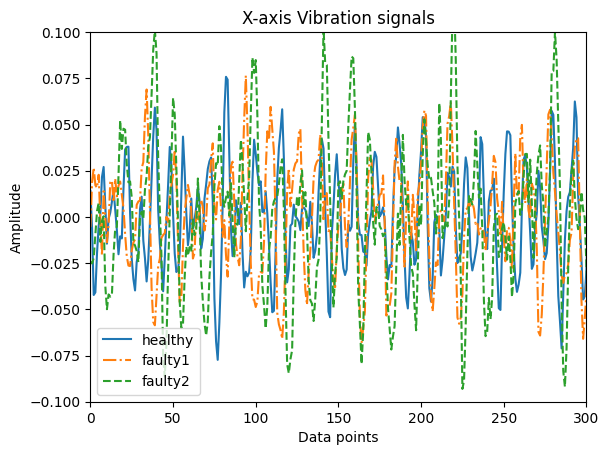

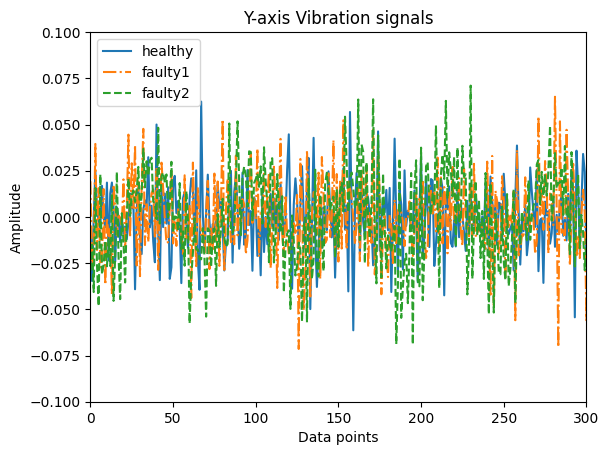

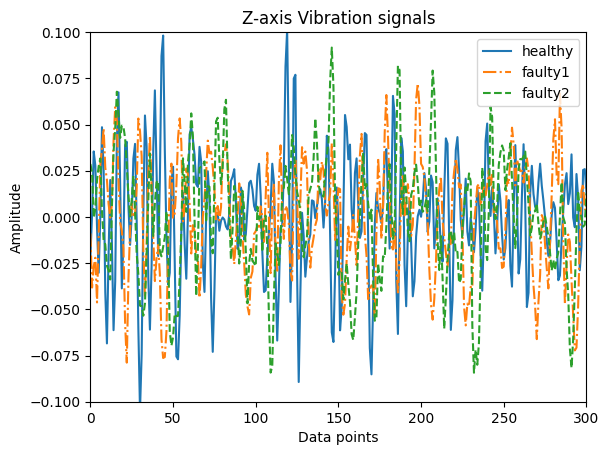

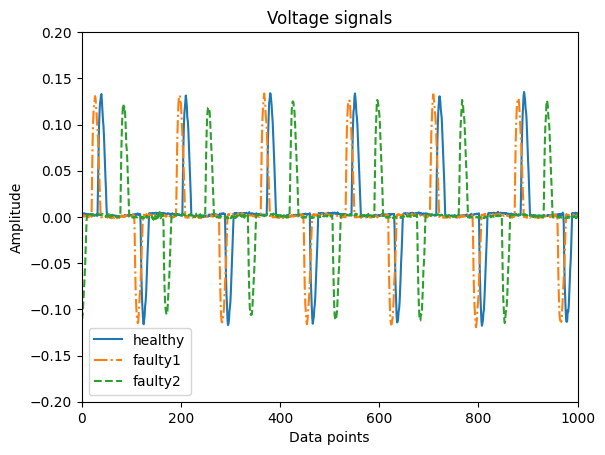

In [ ]:
###########  Plot the healthy and faulty vibration signals ###########
plt.figure()
plt.plot(healthy_xVibrationDataset[:, 1])
plt.plot(faulty1_xVibrationDataset[:, 1],linestyle='-.')
plt.plot(faulty2_xVibrationDataset[:, 1],linestyle='--')
plt.axis([0, 300, -.1, .1]) #set x and y - axis range
plt.ylabel('Amplitude')
plt.xlabel('Data points')
plt.legend(['healthy','faulty1','faulty2'])
plt.title('X-axis Vibration signals')
plt.show

plt.figure()
plt.plot(healthy_yVibrationDataset[:, 1])
plt.plot(faulty1_yVibrationDataset[:, 1],linestyle='-.')
plt.plot(faulty2_yVibrationDataset[:, 1],linestyle='--')
plt.axis([0, 300, -.1, .1]) #set x and y - axis range
plt.ylabel('Amplitude')
plt.xlabel('Data points')
plt.legend(['healthy','faulty1','faulty2'])
plt.title('Y-axis Vibration signals')
plt.show

plt.figure()
plt.plot(healthy_zVibrationDataset[:, 1])
plt.plot(faulty1_zVibrationDataset[:, 1],linestyle='-.')
plt.plot(faulty2_zVibrationDataset[:, 1],linestyle='--')
plt.axis([0, 300, -.1, .1]) #set x and y - axis range
plt.ylabel('Amplitude')
plt.xlabel('Data points')
plt.legend(['healthy','faulty1','faulty2'])
plt.title('Z-axis Vibration signals')
plt.show

plt.figure()
plt.plot(healthy_VoltageDataset[:, 1])
plt.plot(faulty1_VoltageDataset[:, 1],linestyle='-.')
plt.plot(faulty2_VoltageDataset[:, 1],linestyle='--')
plt.axis([0, 1000, -.2, .2]) #set x and y - axis range
plt.ylabel('Amplitude')
plt.xlabel('Data points')
plt.legend(['healthy','faulty1','faulty2'])
plt.title('Voltage signals')

########### End ###########